In [1]:
import tweepy
import pandas as pd

In [2]:
consumer_key = '8F6g6LFhVWYP6SaYmq3x0wJhs'
consumer_secret = 'Pcu6yLtKJLwOeAfVtZgA8rfdQ8TMn4w4uMFeJ3Ca824KeOg3qw'
access_token = '3814958176-rUAJTJ2ULERlCZd76ceXUYu1jmV1bOlHnaF0Kyg'
access_token_secret = 'FGa2b2gP4Yd5F4PxScQ1WqhRuFOjiVUcsqFbmS5YAczoF'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
public_tweets = tweepy.Cursor(api.search, q='NRC, CAA', lang = "en")
tweet_count = 500

tweets_result = public_tweets.items(tweet_count)

tweets = []

for tweet in tweets_result:
    tweets.append(tweet.text)

In [3]:
tweet_df = pd.DataFrame({'tweet':tweets})

In [4]:
tweet_df.head()

,tweet
0,RT @bkrs100: Drone shots of Massive #mangalore...
1,RT @poojansahil: That feeling when your lyrics...
2,"RT @shadabmoizee: After 25 days, @BhimArmyChie..."
3,"RT @4Nahal: This is from Darbhanga, Bihar.\n\n..."
4,RT @mirzasomanbeig: @IndiaNisha18 @narendramod...


In [5]:
import nltk

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [8]:
sid = SentimentIntensityAnalyzer()

In [9]:
sid.polarity_scores(tweet_df.loc[0]['tweet'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [10]:
tweet_df['scores'] = tweet_df['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))

tweet_df.head()

,tweet,scores
0,RT @bkrs100: Drone shots of Massive #mangalore...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,RT @poojansahil: That feeling when your lyrics...,"{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp..."
2,"RT @shadabmoizee: After 25 days, @BhimArmyChie...","{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp..."
3,"RT @4Nahal: This is from Darbhanga, Bihar.\n\n...","{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp..."
4,RT @mirzasomanbeig: @IndiaNisha18 @narendramod...,"{'neg': 0.153, 'neu': 0.741, 'pos': 0.106, 'co..."


In [11]:
tweet_df['compound']  = tweet_df['scores'].apply(lambda score_dict: score_dict['compound'])

tweet_df.head()

,tweet,scores,compound
0,RT @bkrs100: Drone shots of Massive #mangalore...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,RT @poojansahil: That feeling when your lyrics...,"{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...",0.2695
2,"RT @shadabmoizee: After 25 days, @BhimArmyChie...","{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",-0.6597
3,"RT @4Nahal: This is from Darbhanga, Bihar.\n\n...","{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.3182
4,RT @mirzasomanbeig: @IndiaNisha18 @narendramod...,"{'neg': 0.153, 'neu': 0.741, 'pos': 0.106, 'co...",-0.2263


In [12]:
def sentiment(score):
    if score >0:
        return "Positive"
    elif score ==0:
        return "Neutral"
    else:
        return "Negative"

tweet_df['comp_score'] = tweet_df['compound'].apply(sentiment)

tweet_df.head()

,tweet,scores,compound,comp_score
0,RT @bkrs100: Drone shots of Massive #mangalore...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,RT @poojansahil: That feeling when your lyrics...,"{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...",0.2695,Positive
2,"RT @shadabmoizee: After 25 days, @BhimArmyChie...","{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",-0.6597,Negative
3,"RT @4Nahal: This is from Darbhanga, Bihar.\n\n...","{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.3182,Negative
4,RT @mirzasomanbeig: @IndiaNisha18 @narendramod...,"{'neg': 0.153, 'neu': 0.741, 'pos': 0.106, 'co...",-0.2263,Negative


In [13]:
graph = tweet_df["comp_score"].value_counts()

In [14]:
import matplotlib.pyplot as plt

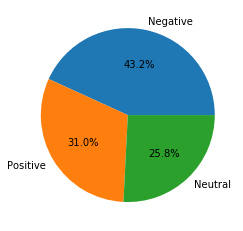

In [15]:
labels = ["Negative", "Positive", "Neutral"]
plt.pie(graph, labels = labels, autopct = "%1.1f%%");